## Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Generation

In [9]:
# Parameters
bakeries = ['Bakery_1', 'Bakery_2', 'Bakery_3', 'Bakery_4', 'Bakery_5']
num_customers = 100
start_date = datetime.now() - timedelta(days=180)
end_date = datetime.now()

# Helper function to generate random dates
def random_date(start, end):
    return start + (end - start) * random.random()

# Helper function to generate random time of day
def random_time():
    return random.choice(['Morning', 'Afternoon', 'Evening'])

In [10]:
# Generating the dataset
data = []

for bakery in bakeries:
    for customer_id in range(1, num_customers + 1):
        age = random.randint(18, 70)
        gender = random.choice(['Male', 'Female', 'Non-binary'])
        items_purchased = random.randint(1, 20)
        amount_spent = round(items_purchased * random.uniform(5, 20), 2)  # assuming price range between 5 to 20
        purchase_date = random_date(start_date, end_date).strftime('%Y-%m-%d')
        time_of_purchase = random_time()
        loyalty_member = random.choice(['Yes', 'No'])
        payment_method = random.choice(['Cash', 'Card', 'Mobile Payment'])
        
        data.append([bakery, customer_id, age, gender, items_purchased, amount_spent, purchase_date, 
                     time_of_purchase, loyalty_member, payment_method])


In [11]:
# Creating DataFrame
columns = ['Bakery_ID', 'Customer_ID', 'Age', 'Gender', 'Items_Purchased', 'Amount_Spent', 
           'Purchase_Date', 'Time_of_Purchase', 'Loyalty_Member', 'Payment_Method']
df = pd.DataFrame(data, columns=columns)

# Saving the DataFrame to CSV
csv_file_path = 'bakery_customer_data.csv'
df.to_csv(csv_file_path, index=False)

## Visualizing the Data

/tmp/ipykernel_30/3137412464.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time_of_Purchase', y='Amount_Spent', hue='Bakery_ID', data=df, ci=None)


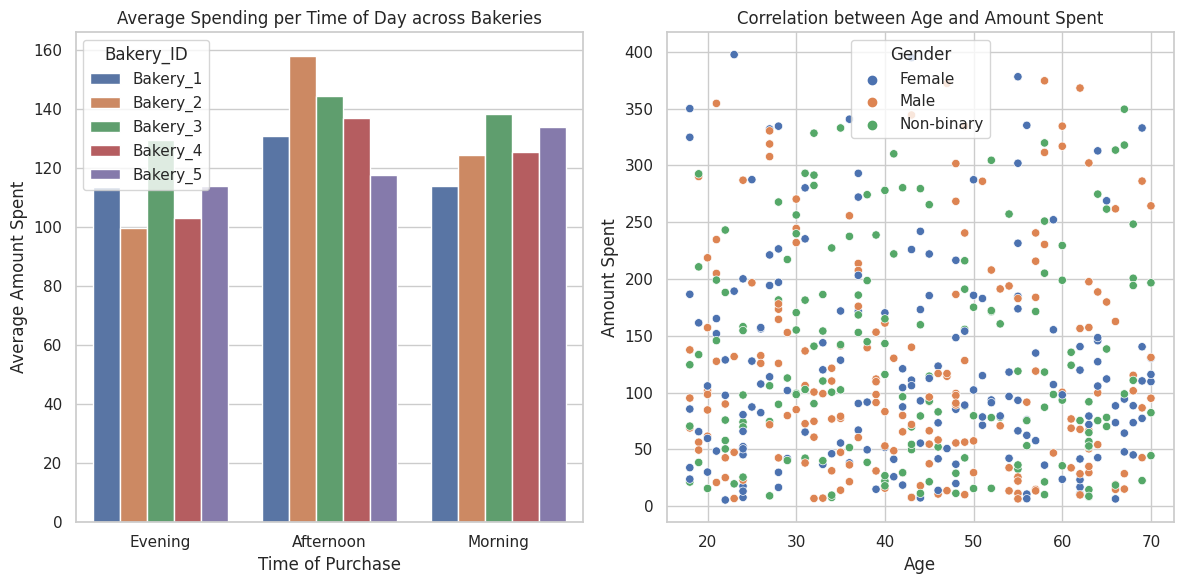

In [35]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Visualization 1: Average Spending per Time of Day across Bakeries
plt.subplot(1, 2, 1)
sns.barplot(x='Time_of_Purchase', y='Amount_Spent', hue='Bakery_ID', data=df, ci=None)
plt.title('Average Spending per Time of Day across Bakeries')
plt.xlabel('Time of Purchase')
plt.ylabel('Average Amount Spent')

# Visualization 2: Correlation between Age and Spending
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Amount_Spent', hue='Gender',markers='*', data=df)
plt.title('Correlation between Age and Amount Spent')
plt.xlabel('Age')
plt.ylabel('Amount Spent')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/3531036295.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Loyalty_Member', y='Amount_Spent', hue='Bakery_ID', data=df, ci=None)


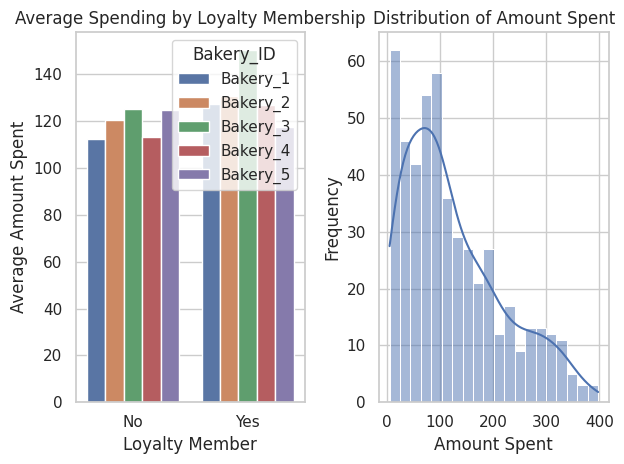

In [22]:
# Visualization 3: Distribution of Amount Spent
plt.subplot(1,2,2)
sns.histplot(df['Amount_Spent'], bins=20, kde=True)
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')

# Visualization 4: Spending by Loyalty Membership
plt.subplot(1,2,1)
sns.barplot(x='Loyalty_Member', y='Amount_Spent', hue='Bakery_ID', data=df, ci=None)
plt.title('Average Spending by Loyalty Membership')
plt.xlabel('Loyalty Member')
plt.ylabel('Average Amount Spent')

plt.tight_layout()
plt.show()

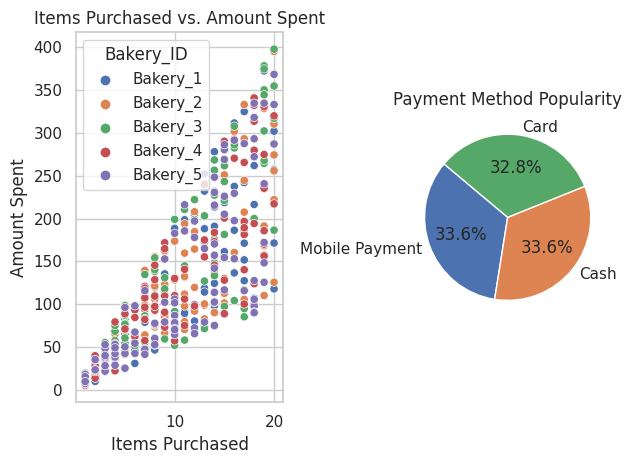

In [31]:
# Visualization 5: Payment Method Popularity
plt.subplot(1,2,2)
payment_counts = df['Payment_Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Popularity')

# Visualization 6: Correlation between Items Purchased and Amount Spent
plt.subplot(1,2,1)
sns.scatterplot(x='Items_Purchased', y='Amount_Spent',hue='Bakery_ID', data=df)
plt.title('Items Purchased vs. Amount Spent')
plt.xlabel('Items Purchased')
plt.ylabel('Amount Spent')

plt.tight_layout()
plt.show()

## Generating Insights

In [15]:
# Average Age per Bakery
avg_age_per_bakery = df.groupby('Bakery_ID')['Age'].mean().reset_index()
print("\nAverage Age per Bakery:")
print(avg_age_per_bakery)


Average Age per Bakery:
  Bakery_ID    Age
0  Bakery_1  42.35
1  Bakery_2  45.81
2  Bakery_3  41.90
3  Bakery_4  44.90
4  Bakery_5  43.00


In [16]:
# Correlation between age and spending
age_spending_corr = df['Age'].corr(df['Amount_Spent'])
print(f"\nCorrelation between Age and Amount Spent: {age_spending_corr:.2f}")


Correlation between Age and Amount Spent: -0.03


In [41]:
# Average spending per customer based on time of day across bakeries

# Group by Bakery and Time_of_Purchase, then calculate mean spending
insight = df.groupby(['Bakery_ID', 'Time_of_Purchase'])['Amount_Spent'].mean().reset_index()
insight['Amount_Spent'] = insight['Amount_Spent'].astype(int)
insight = insight.sort_values(by='Bakery_ID', ascending=True)

print("\nAverage Spending per Time of Day across Bakeries:")
print(insight.to_string(index=False))


Average Spending per Time of Day across Bakeries:
Bakery_ID Time_of_Purchase  Amount_Spent
 Bakery_1        Afternoon           130
 Bakery_1          Evening           113
 Bakery_1          Morning           113
 Bakery_2        Afternoon           158
 Bakery_2          Evening            99
 Bakery_2          Morning           124
 Bakery_3        Afternoon           144
 Bakery_3          Evening           129
 Bakery_3          Morning           138
 Bakery_4        Afternoon           137
 Bakery_4          Evening           103
 Bakery_4          Morning           125
 Bakery_5        Afternoon           117
 Bakery_5          Evening           114
 Bakery_5          Morning           133
